In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# FIXED PERCENTAGE

In [5]:
def fixed_percentage(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        hatches = ['//', '\\\\', '||', '--', '..'],
        y_lim = [0, 1],
        interval_length=250
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    plt.rcParams.update({'font.size': 22})
    for dataset in datasets:
        # fig = plt.figure(figsize=(18, 8))
        fig = plt.figure(figsize=(18, 8))
        # fig, axs = plt.subplots(1, len(models), figsize=(15, 8))
        # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        gs = fig.add_gridspec(ncols=len(models), wspace=0)
        axs = gs.subplots(sharex=False, sharey=True)
        axs[0].set_ylabel(f'Number of errors')
        # axs[0].set_yscale('log')
        # axs[0].set_ylim(y_lim)
        plt.suptitle(f'Error barplots for {dataset} dataset')
        
        for m_index, model in enumerate(models):
            bar_data = {
                'successful': [],
                'error': []
            }
            for p_index, percentage in enumerate(percentages):
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    bar_data['successful'].append(len(data.loc[data['score'] > 0]))
                    bar_data['error'].append(len(data.loc[data['score'] <= 0]))
                except:
                    bar_data['successful'].append(0)
                    bar_data['error'].append(0)
                try:
                    callback_errors = pd.read_csv(f'../experiments/{experiment_name}/callback_errors.csv')
                    bar_data['c_errors'] += len(callback_errors)
                except:
                    bar_data['c_errors'] = 0
            # bar_data['successful'] = np.array(bar_data['successful'])
            # bar_data['error'] = np.array(bar_data['error'])
            # print(bar_data)
            bottom = np.zeros(len(percentages))
            for boolean, weight_count in bar_data.items():
                axs[m_index].bar([str(p) for p in percentages], weight_count, 0.5, label=boolean, bottom=bottom)
                bottom += weight_count
            axs[m_index].set_xlabel(f'{model}')
            axs[m_index].grid()
            # axs[m_index].set_xlim([-0.5, len(percentages)-0.5])
        plt.show()
        # plt.savefig(f'summary-boxplot-weight-{dataset}.png', transparent=True)

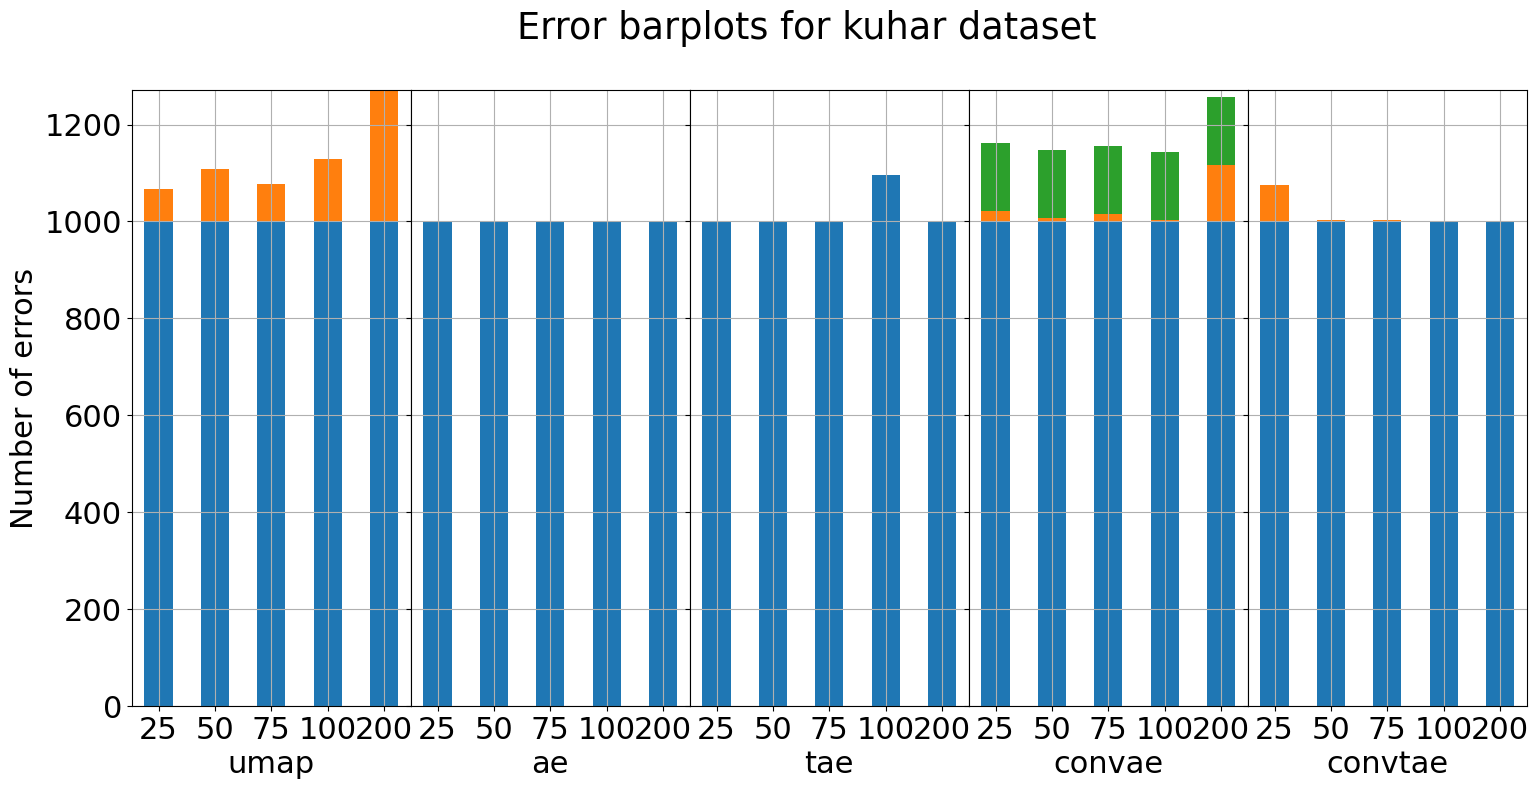

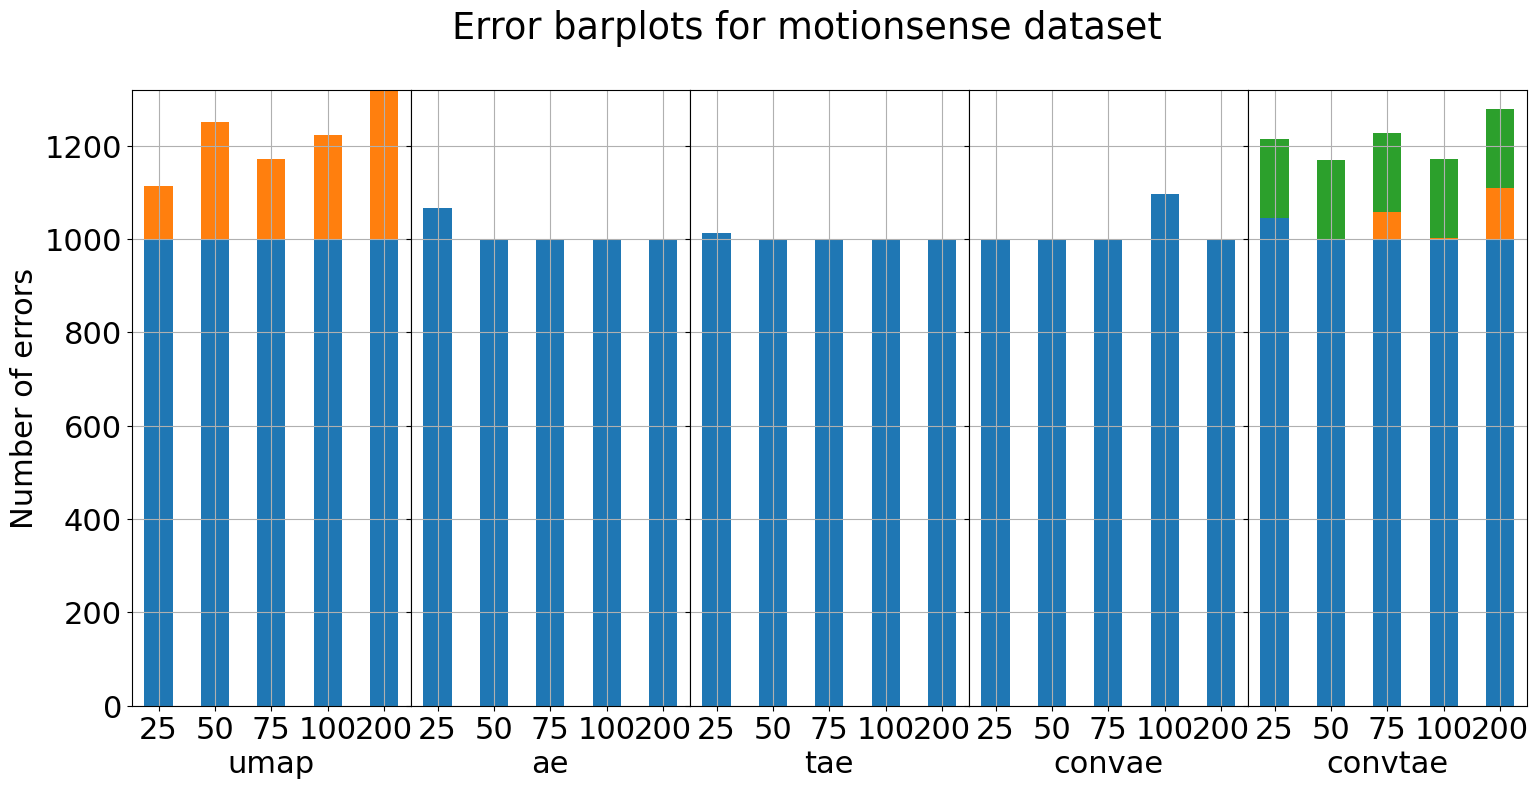

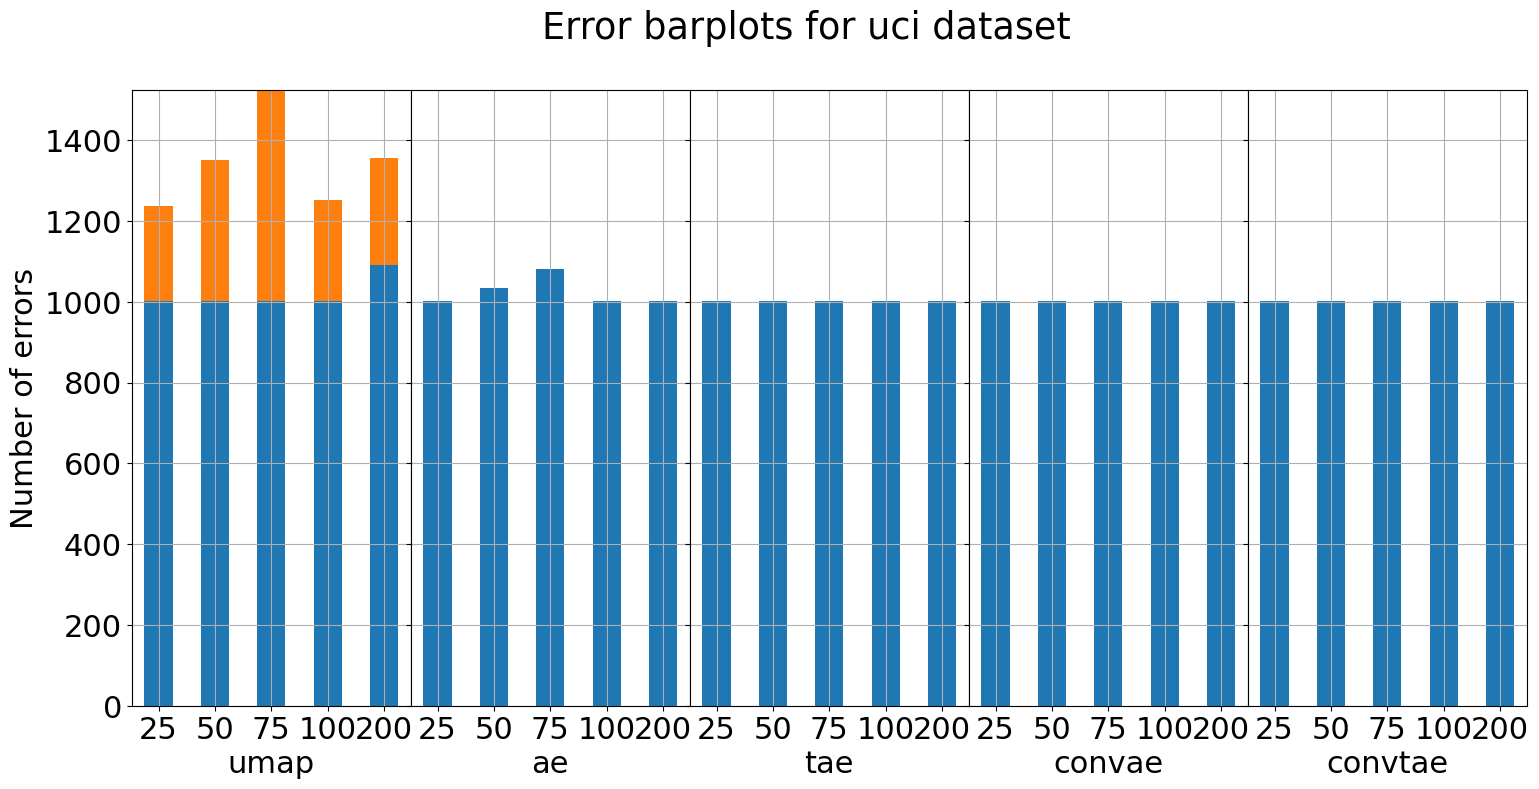

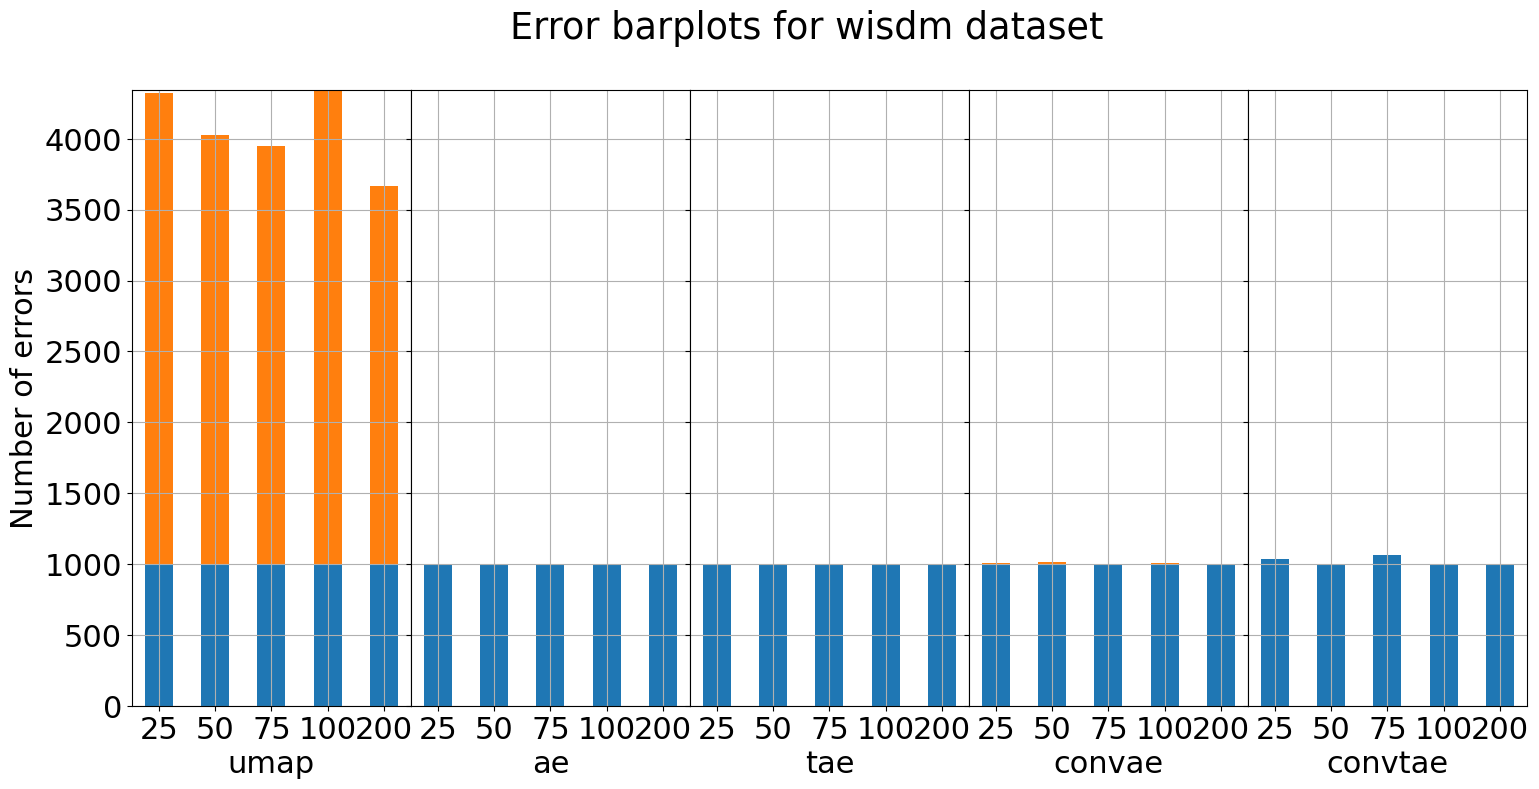

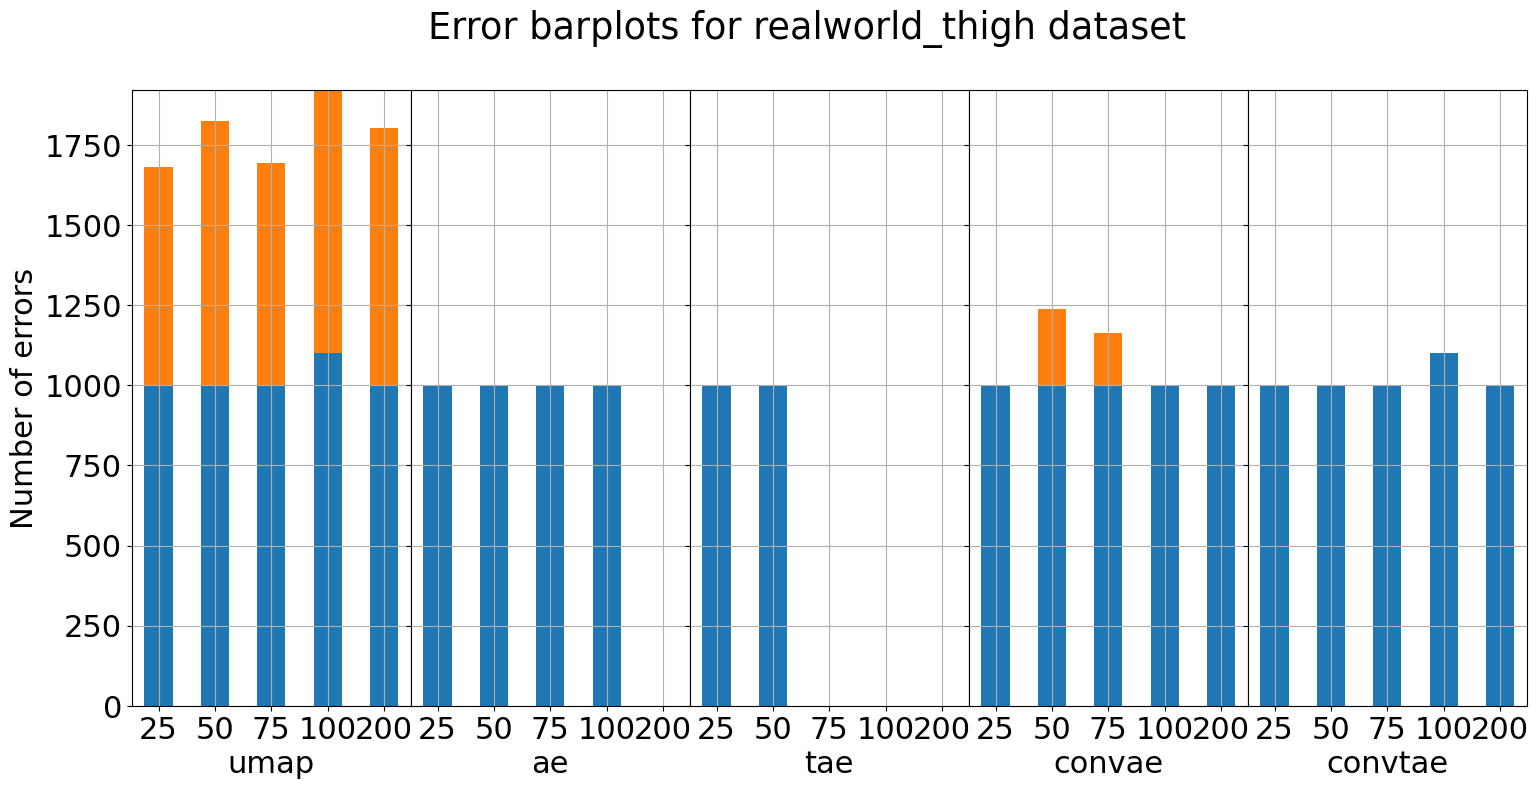

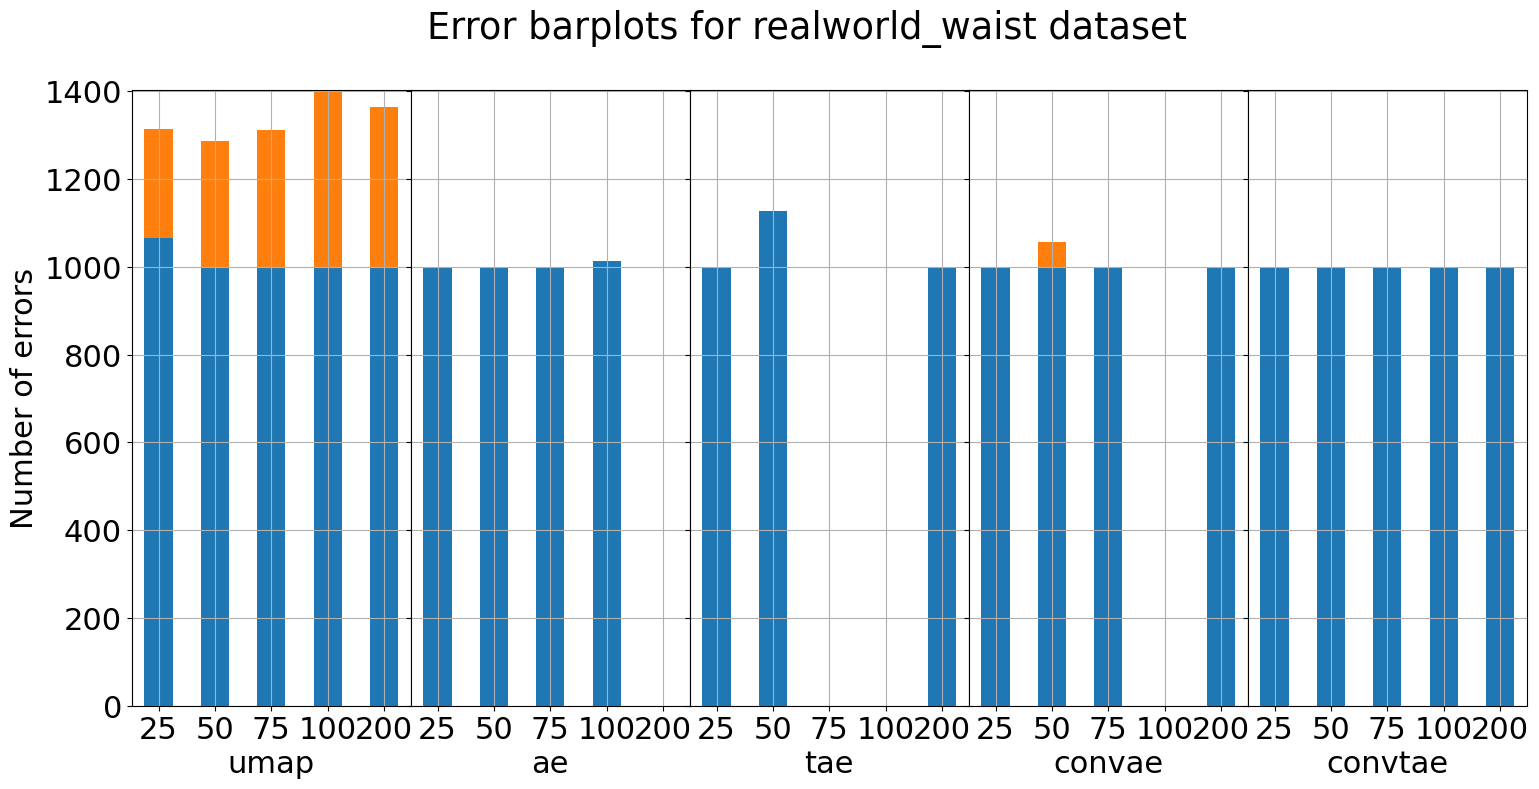

In [6]:
fixed_percentage(datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'], models=['umap', 'ae', 'tae', 'convae', 'convtae'])